## House Prices Prediction

In this project I would use the Linear Regression model class to predict house prices in boston, usa. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
boston_df = pd.read_csv('boston.csv')

In [4]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### Basic Info on the dataset

A data set containing housing values in 506 suburbs of Boston.

- `crim`: per capita crime rate by town.
- `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.
- `indus`: proportion of non-retail business acres per town.
- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- `nox`: nitrogen oxides concentration (parts per 10 million).
- `rm`: average number of rooms per dwelling.
- `age`: proportion of owner-occupied units built prior to 1940.
- `dis`: weighted mean of distances to five Boston employment centres.
- `rad`: index of accessibility to radial highways.
- `tax`: full-value property-tax rate per (10,000 USD).
- `ptratio`: pupil-teacher ratio by town.
- `lstat`: lower status of the population (percent).
- `medv`: median value of owner-occupied homes in $1000s.

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
boston_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## EDA

In [7]:
round(boston_df.ZN.mean())

11

In [8]:
boston_df[boston_df.ZN != 0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,0.07950,60.0,1.69,0,0.411,6.579,35.9,10.7103,4,411.0,18.3,370.78,5.49,24.1
352,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411.0,18.3,392.33,7.79,18.6
353,0.01709,90.0,2.02,0,0.410,6.728,36.1,12.1265,5,187.0,17.0,384.46,4.50,30.1
354,0.04301,80.0,1.91,0,0.413,5.663,21.9,10.5857,4,334.0,22.0,382.80,8.05,18.2


In [9]:
boston_df[boston_df.ZN == 0]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [10]:
# Ratio
zn_25k_y = (134/506) * 100
zn_25k_n = (372/506) * 100

print('{:.2f}% of the town contains residential lot of 25k square feet while {:.2f}% of town does not have any'.format(zn_25k_y, zn_25k_n))

26.48% of the town contains residential lot of 25k square feet while 73.52% of town does not have any


This doesn't imply that there are no residential homes in the town (i.e where ZN is 0) it basically just mean that there not residential houses that are 25 thousand square feet or greater. Also all these values are in proportions.

Now that I know the proportion of towns and suburbs with 25k sq.ft residents tells see if there the average number of rooms vary as a result

In [11]:
yes = boston_df[boston_df.ZN != 0]
no = boston_df[boston_df.ZN == 0]

In [12]:
yes.RM.min(), yes.RM.max()

(5.56, 8.704)

In [13]:
no.RM.min(), yes.RM.max()

(3.561, 8.704)

Are there better job opportunities for those in the `yes` areas

In [14]:
yes.DIS.min(), yes.DIS.max(), yes.DIS.mean()

(1.801, 12.1265, 6.129491791044777)

In [15]:
no.DIS.min(), no.DIS.max(), no.DIS.mean()

(1.1296, 8.0136, 2.9541389784946235)

### CRIM vs. MEDV

In [16]:
boston_df.CRIM.max()

88.9762

In [17]:
boston_df[boston_df.CRIM == 88.9762]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666.0,20.2,396.9,17.21,10.4


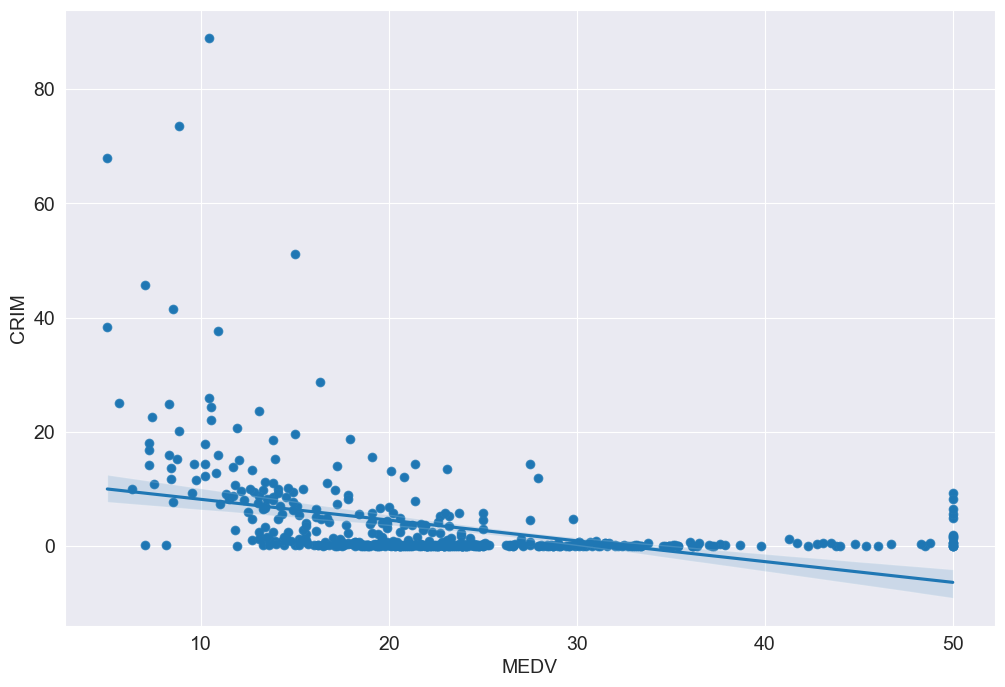

In [18]:
sns.scatterplot(data=boston_df, x='MEDV', y='CRIM')
sns.regplot(data=boston_df, x='MEDV', y='CRIM');

In [19]:
boston_df.MEDV.corr(boston_df.CRIM)

-0.3883046085868113

The graph and the correlation of -0.38 between crime rate per capita (`CRIM`) and median value of owner-occupied homes (`MEDV`) suggests that as `CRIM` increases `MEDV` decreases which makes sense because places with higher crime rates are considered to be less liveable and the demand for home in such a place is low and as a result of the low demand the prices would be lowered which is apparent in this same dataset.

## NOX vs. MEDV

In [20]:
boston_df.NOX.max()

0.871

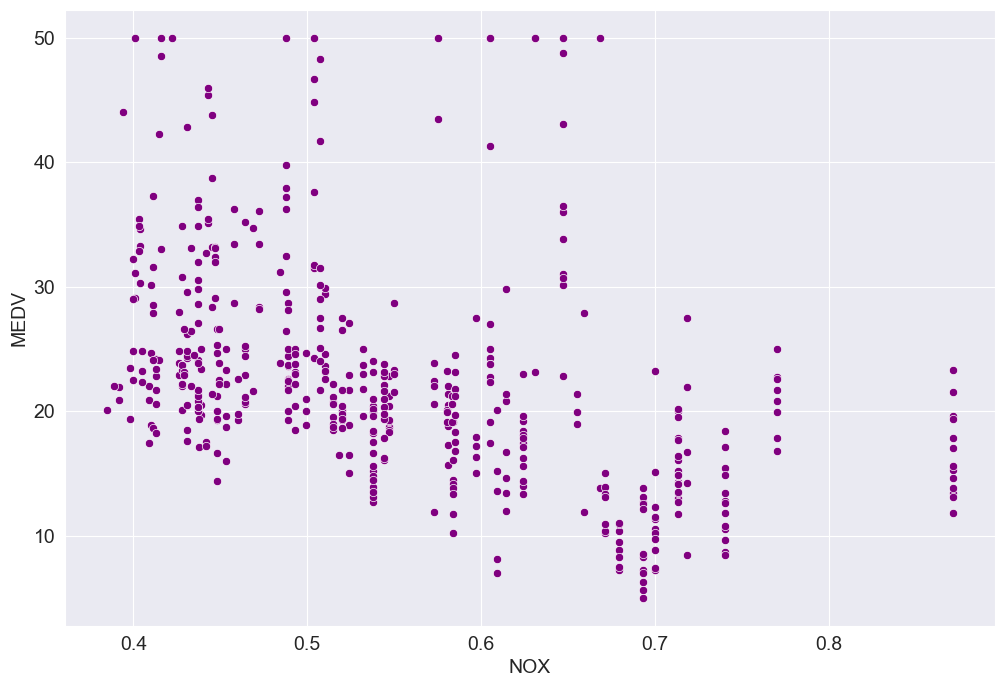

In [21]:
sns.scatterplot(data=boston_df, x='NOX', y='MEDV', color='purple');

## MEDV vs. TAX and LSTAT

In [22]:
boston_df.MEDV.corr(boston_df.TAX)

-0.4685359335677669

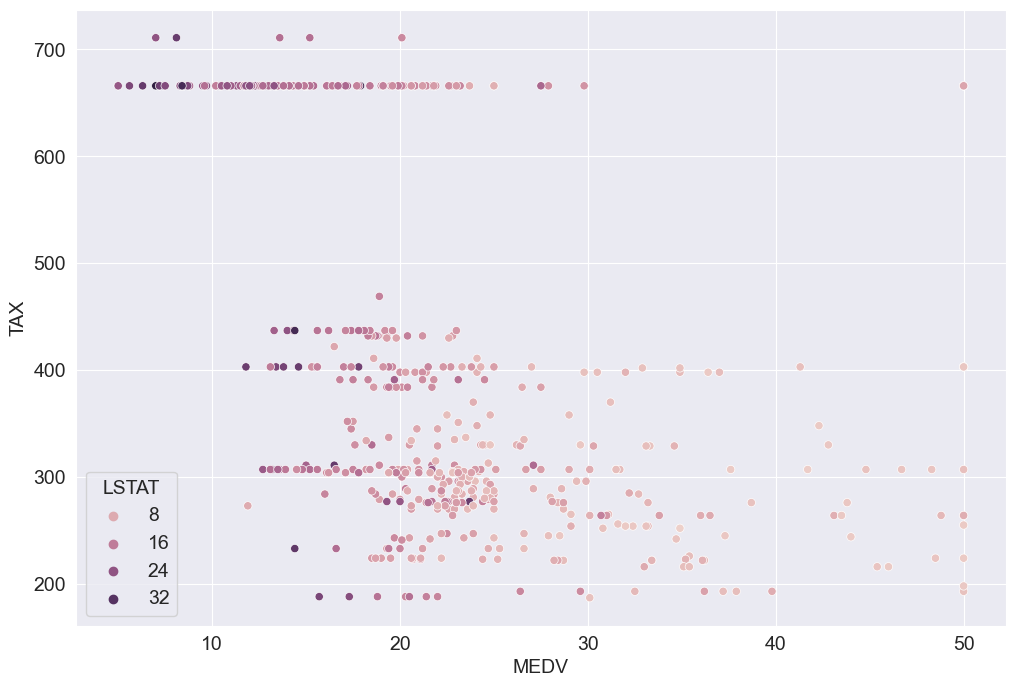

In [23]:
sns.scatterplot(data=boston_df, x='MEDV', y='TAX', hue='LSTAT');

This is very interesting to look at, this graph shows the relationship between `TAX` and `MEDV` and `LSTAT` which is the proportion of low status families i.e poor people each town or suburbs. The graph shows that the areas with higher proportion of `LSTAT` the median value of owner-occupied homes is less but at the same time these ares tend to pay more taxes than ares with lower proportion of `LSTAT`.

## MEDV vs RM

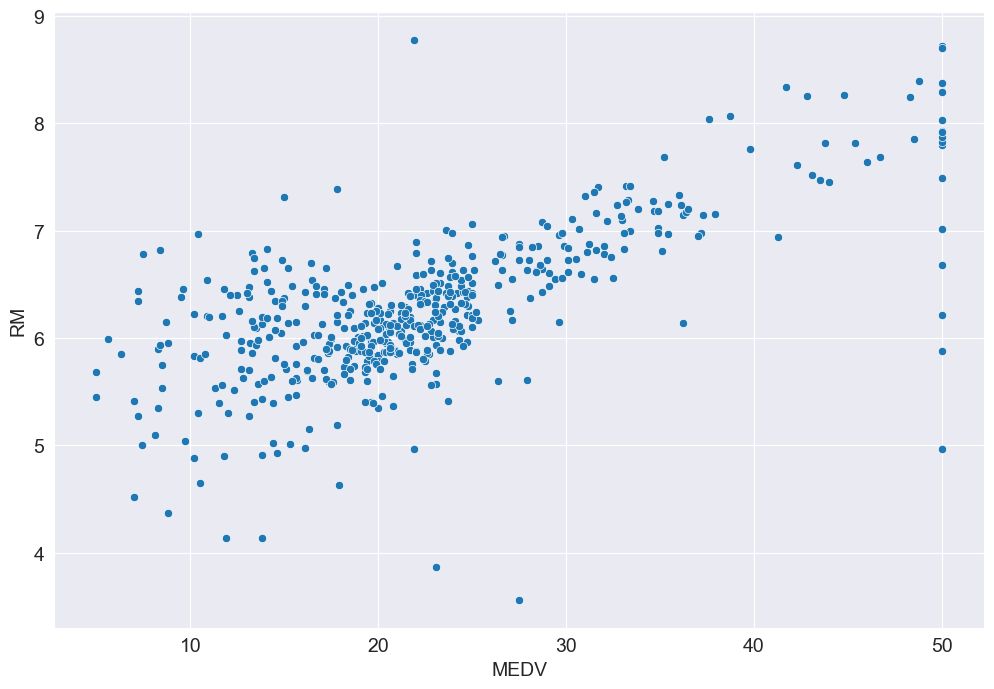

In [24]:
sns.scatterplot(data=boston_df, x='MEDV', y='RM');

In [25]:
boston_df.MEDV.corr(boston_df.RM)

0.695359947071539

The graph above shows that the number of average number of rooms per dwelling is strongly correlated with the value of home

## MEDV vs. DIS 

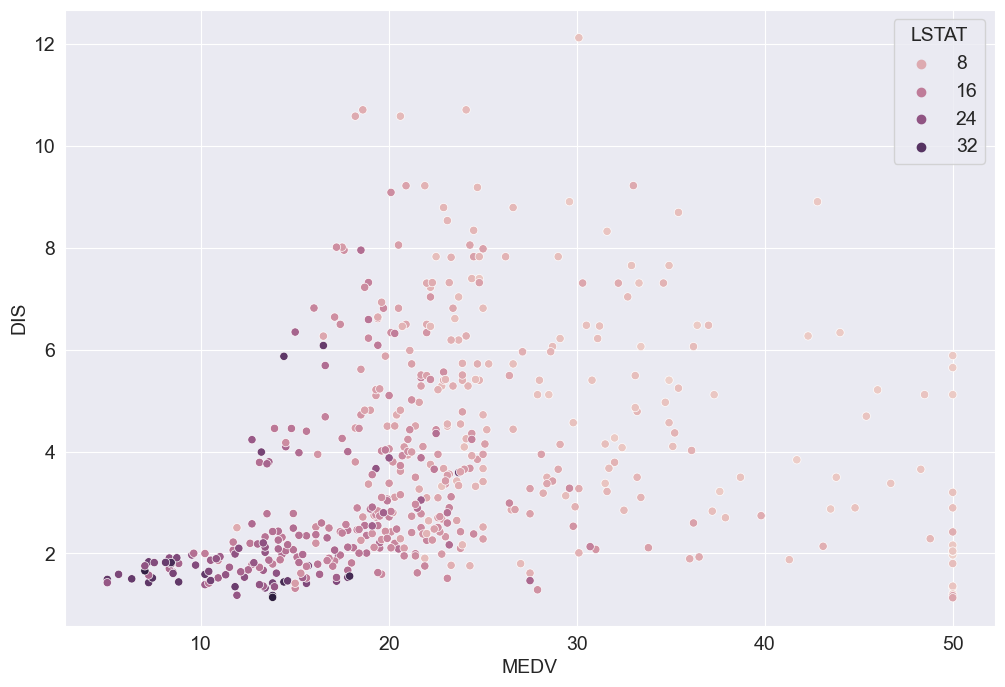

In [26]:
sns.scatterplot(data=boston_df, x='MEDV', y='DIS', hue='LSTAT');

We can observe that towns that are closest to one of the 5 employment centers also have high proportion of `LSTAT` but most of the towns and suburbs are close to the one of the employment centers (<6) and we can see a few that are not really close.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


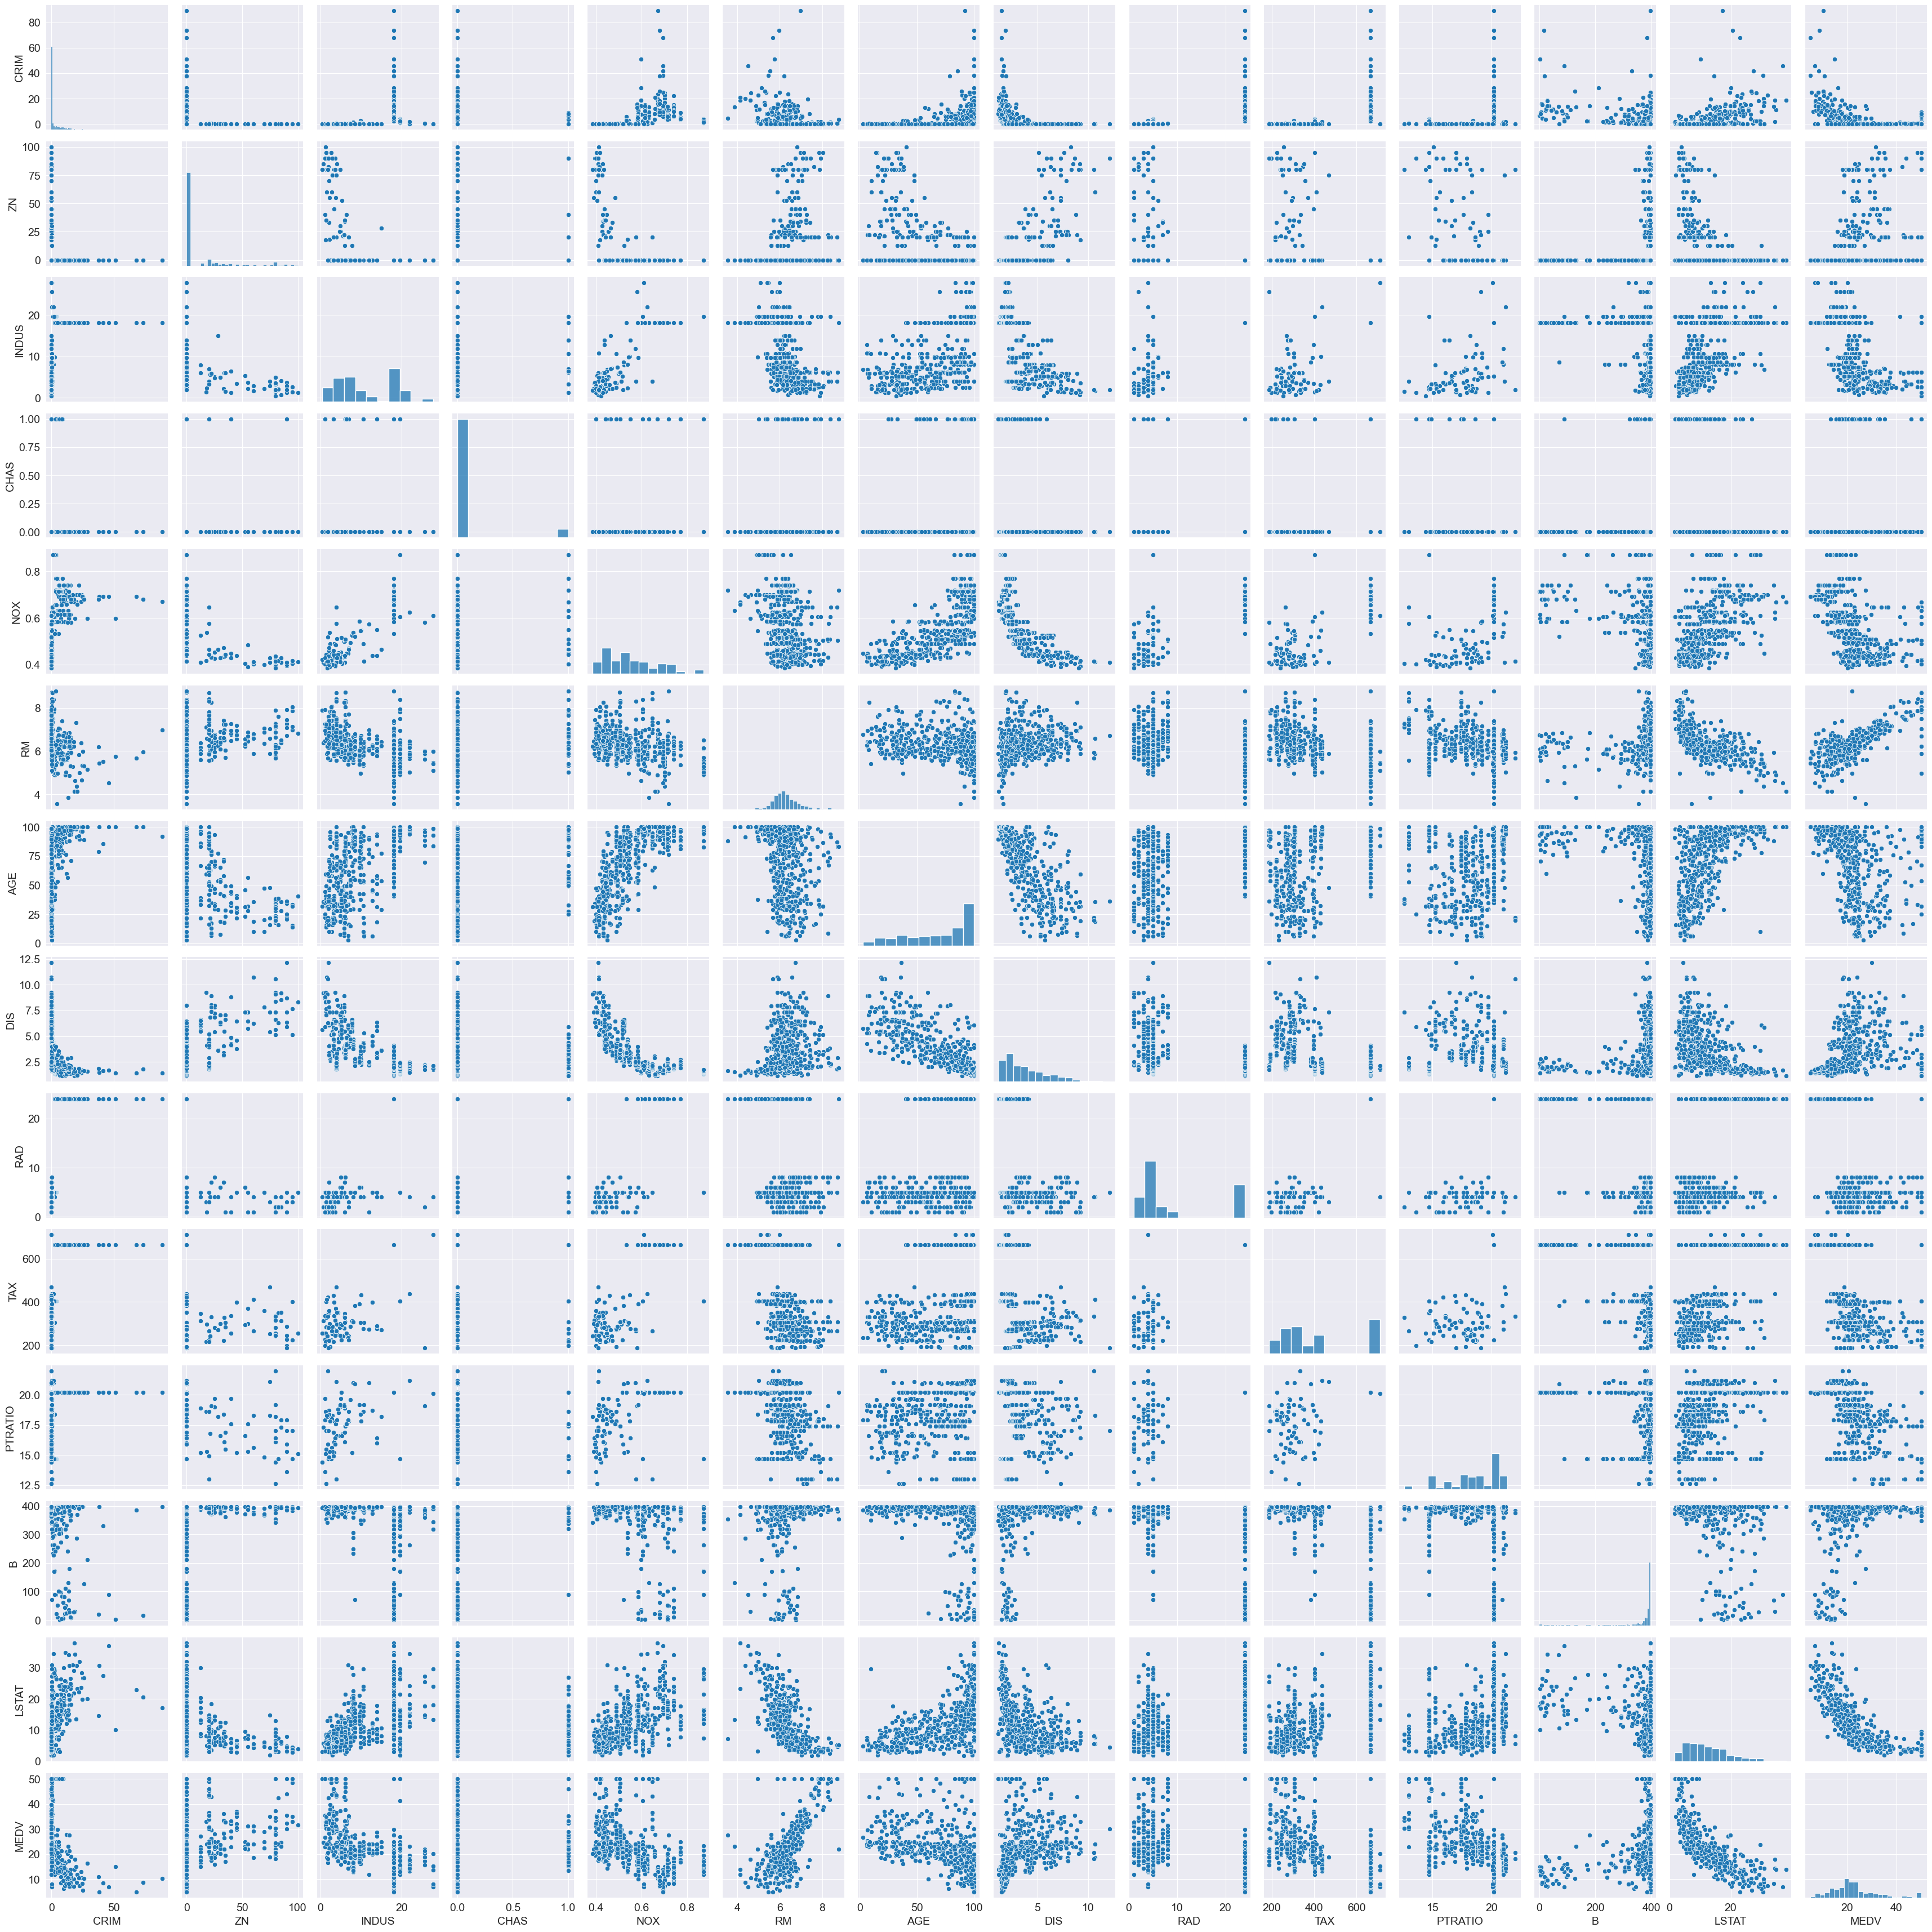

In [27]:
sns.pairplot(data=boston_df)

## INDUS vs. NOX and ZN

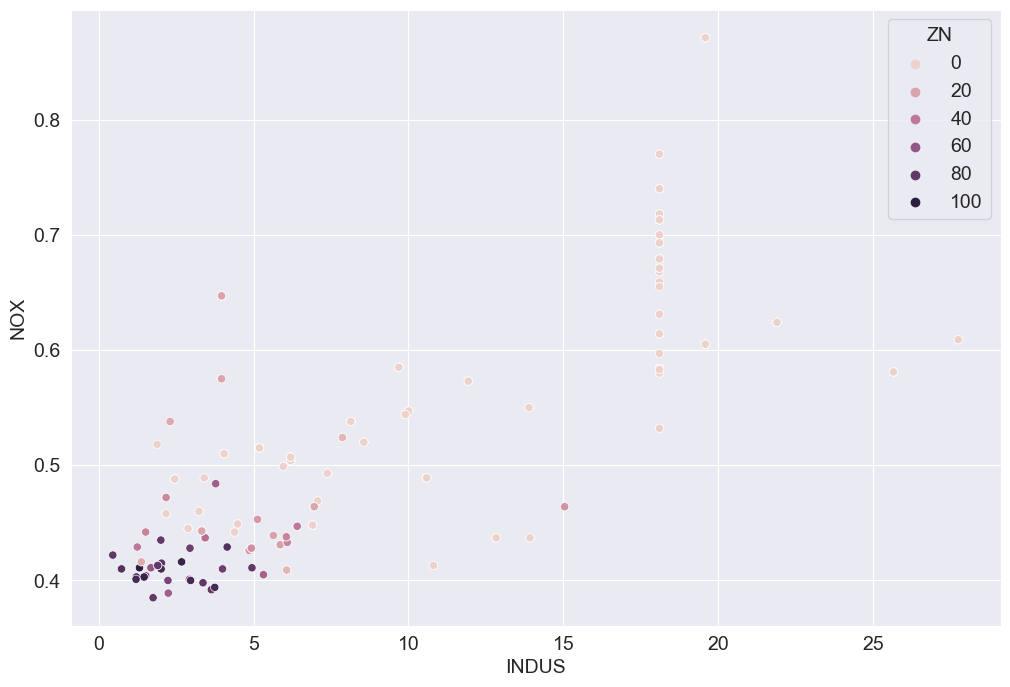

In [28]:
sns.scatterplot(data=boston_df, x='INDUS', y='NOX', hue='ZN');

This shows that areas with higher ZN percentage have low NOX which is marked by low level of industrial activities in those towns or suburbs

In [29]:
boston_df.INDUS.corr(boston_df.NOX)

0.7636514469209147

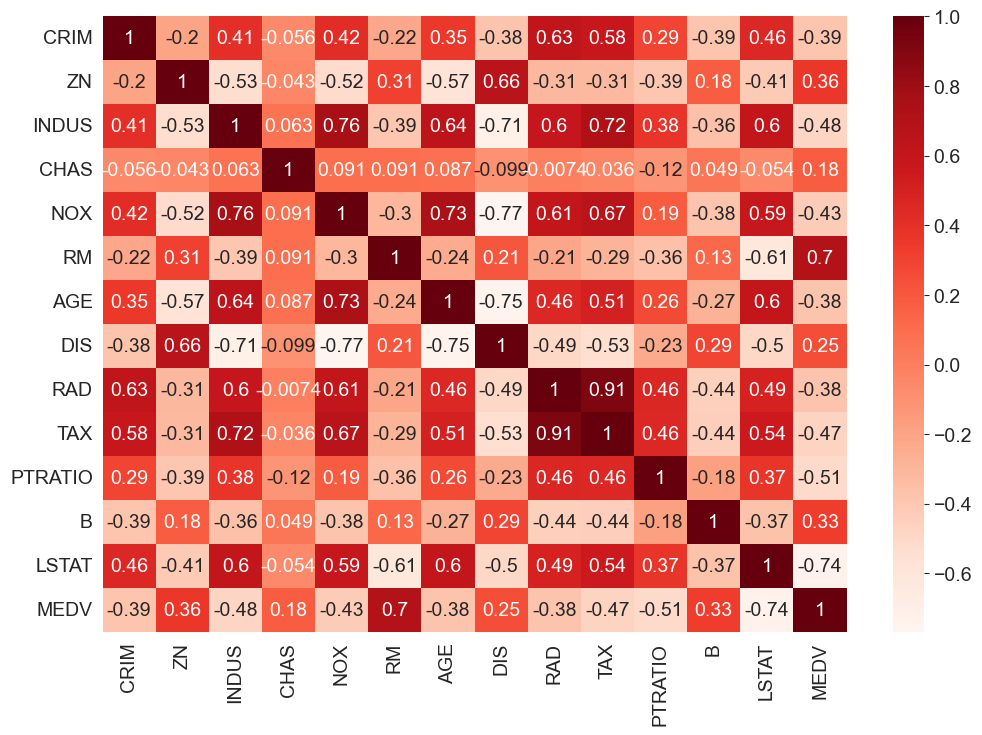

In [30]:
sns.heatmap(data=boston_df.corr(), cmap='Reds', annot=True);

## MEDV vs. AGE

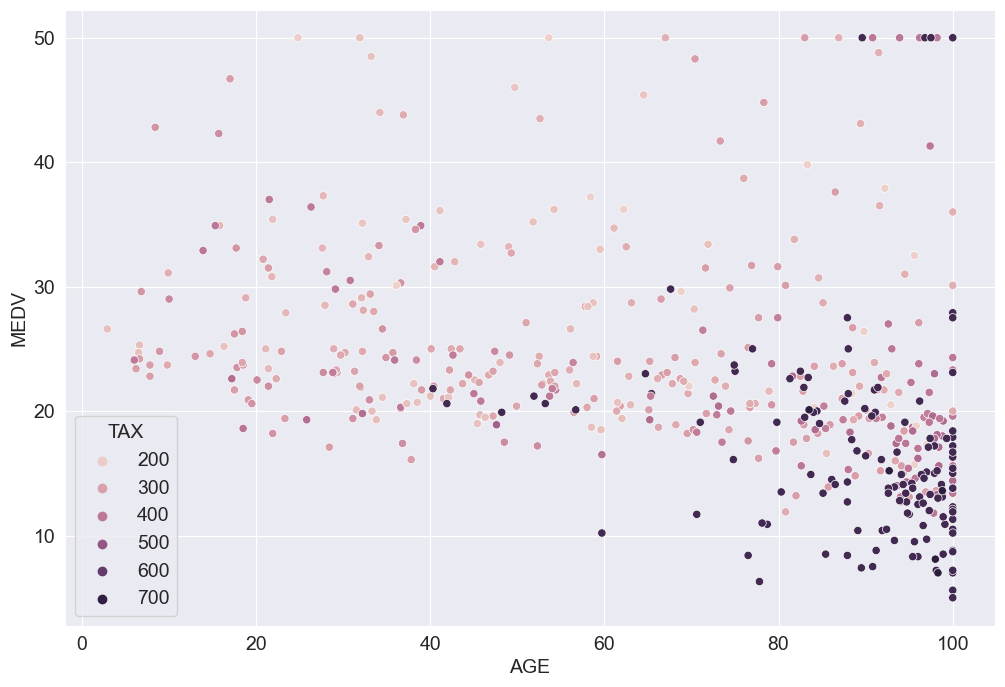

In [31]:
sns.scatterplot(data=boston_df, x='AGE', y='MEDV', hue='TAX');

In [32]:
boston_df.MEDV.corr(boston_df.AGE)

-0.376954565004596

As seen above that the age of the houses are also a factor in the median value of the homes.

## MEDV vs. RAD

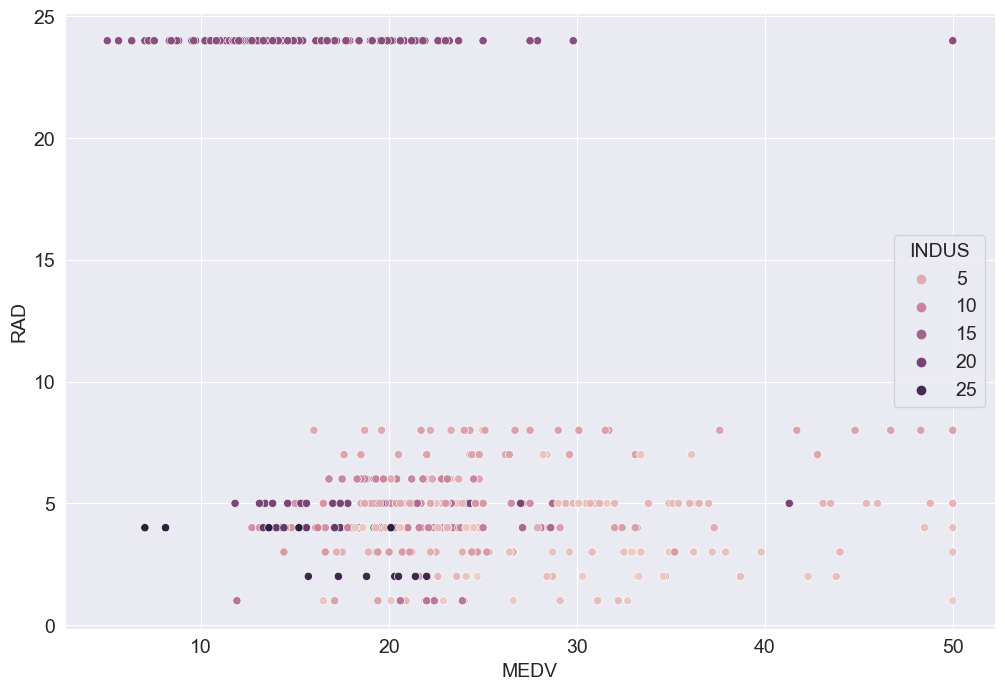

In [33]:
sns.scatterplot(data=boston_df, x='MEDV', y='RAD', hue='INDUS');

Most of the towns that don't have a good access to the highway are industrial areas and houses are cheaper there because it is observed that areas that have only 5% of the land zoned for industrial purpose they have better access to the highway and also the median value of owner-occupied homes are higher and the correlation (from the heatmap above) is -0.38 which makes sense because as RAD increases (becomes worse) the median value of owner-occupied homes reduces.

## MEDV vs. PTRATIO

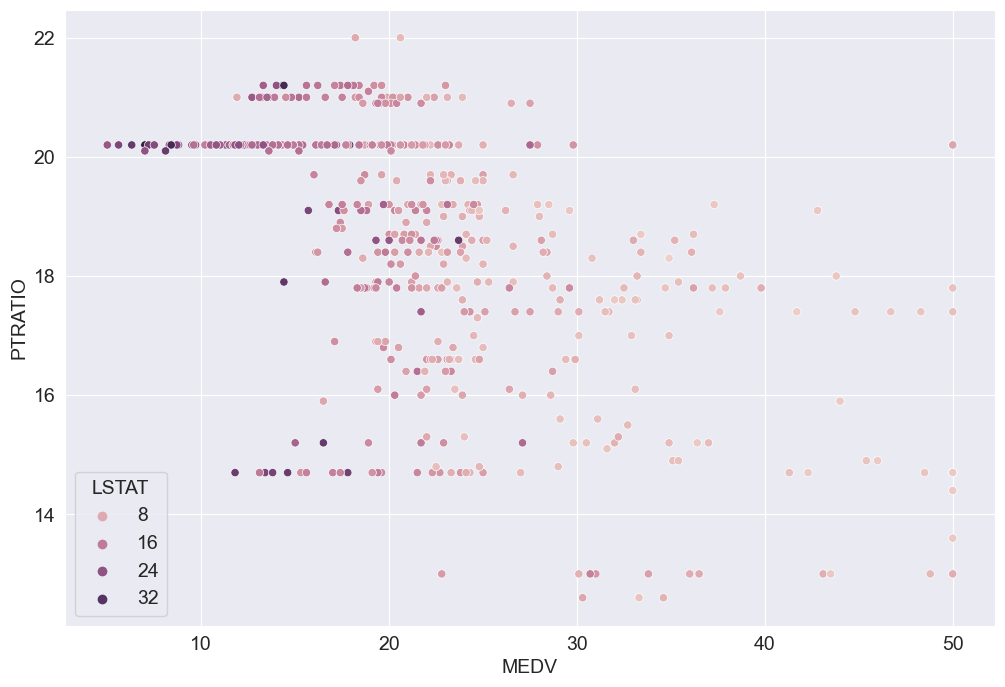

In [34]:
sns.scatterplot(data=boston_df, x='MEDV', y='PTRATIO', hue='LSTAT');

## Preprocessing

In [35]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [36]:
input_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'CHAS']
target_col = 'MEDV'

Before training the model I would split the dataset into 3 parts; `train_set`, `validation_set` and `test_set` which would be take `76.5%`, `13.5%` and `10%` of the dataset respectively.

In [37]:
from sklearn.model_selection import train_test_split as tts

In [38]:
train_val_set, test_set = tts(boston_df, test_size=0.1, random_state=42)
train_set, val_set = tts(train_val_set, test_size=0.15, random_state=42)

In [39]:
train_set.shape, val_set.shape, test_set.shape

((386, 14), (69, 14), (51, 14))

In [40]:
train_input = train_set[input_cols].copy()
train_target = train_set[target_col].copy()
val_input = val_set[input_cols].copy()
val_target = val_set[target_col].copy()
test_input = test_set[input_cols].copy()
test_target = test_set[target_col].copy()

In [41]:
train_input

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS
396,5.87205,0.0,18.10,0.693,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37,0
343,0.02543,55.0,3.78,0.484,6.696,56.4,5.7321,5,370.0,17.6,396.90,7.18,0
339,0.05497,0.0,5.19,0.515,5.985,45.4,4.8122,5,224.0,20.2,396.90,9.74,0
104,0.13960,0.0,8.56,0.520,6.167,90.0,2.4210,5,384.0,20.9,392.69,12.33,0
184,0.08308,0.0,2.46,0.488,5.604,89.8,2.9879,3,193.0,17.8,391.00,13.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,4.54192,0.0,18.10,0.770,6.398,88.0,2.5182,24,666.0,20.2,374.56,7.79,0
374,18.49820,0.0,18.10,0.668,4.138,100.0,1.1370,24,666.0,20.2,396.90,37.97,0
439,9.39063,0.0,18.10,0.740,5.627,93.9,1.8172,24,666.0,20.2,396.90,22.88,0
130,0.34006,0.0,21.89,0.624,6.458,98.9,2.1185,4,437.0,21.2,395.04,12.60,0


In [42]:
train_target

396    12.5
343    23.9
339    19.0
104    20.1
184    26.4
       ... 
360    25.0
374    13.8
439    12.8
130    19.2
116    21.2
Name: MEDV, Length: 386, dtype: float64

Since there are no missing values i'll just scale the data and there is also no need for encoding because all the values are numeric

## Scaling

I would be using the MinMaxScaler to scale the dataset before training

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler().fit(train_input)

In [45]:
scaler.data_min_

array([9.0600e-03, 0.0000e+00, 7.4000e-01, 3.8900e-01, 3.5610e+00,
       2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02, 1.2600e+01,
       3.2000e-01, 1.7300e+00, 0.0000e+00])

In [46]:
scaler.data_max_

array([ 88.9762, 100.    ,  27.74  ,   0.871 ,   8.78  , 100.    ,
        12.1265,  24.    , 711.    ,  22.    , 396.9   ,  37.97  ,
         1.    ])

In [47]:
train_input = scaler.transform(train_input)
val_input = scaler.transform(val_input)
test_input = scaler.transform(test_input)

In [48]:
pd.DataFrame(train_input).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,0.045042,0.120350,0.387708,0.351928,0.526470,0.683391,0.240904,0.393332,0.441468,0.631270,0.889867,0.303413,0.062176
std,0.104233,0.241398,0.255502,0.242841,0.139056,0.285973,0.194754,0.388295,0.326323,0.234229,0.244293,0.201634,0.241789
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000827,0.000000,0.164815,0.132780,0.446158,0.440010,0.083478,0.130435,0.180821,0.510638,0.943763,0.144040,0.000000
50%,0.003719,0.000000,0.289630,0.309129,0.512454,0.778579,0.189699,0.173913,0.293893,0.691489,0.985867,0.260486,0.000000
75%,0.050161,0.193750,0.642963,0.535270,0.591349,0.942070,0.362566,1.000000,0.914122,0.808511,0.998033,0.419426,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now that the data has been preprocessed next i'll save it to parquet

In [49]:
pd.DataFrame(train_input).to_parquet('train_input.parquet')
pd.DataFrame(val_input).to_parquet('val_input.parquet')
pd.DataFrame(test_input).to_parquet('test_input.parquet')

pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

In [52]:
model.fit(train_input, train_target)

LinearRegression()

In [53]:
model.coef_

array([-10.78491576,   4.43298841,   0.8101579 ,  -8.84231412,
        17.37865205,   1.07759297, -15.90860016,   6.6574263 ,
        -5.53867497, -10.04216258,   3.93930775, -20.53643352,
         2.40982445])

In [54]:
model.intercept_

27.991953039608173

In [55]:
train_pred = model.predict(train_input)

In [56]:
pd.DataFrame(train_pred)

,0
0,19.355311
1,27.884119
2,21.072054
3,21.682868
4,23.196612
...,...
381,23.114918
382,1.019575
383,13.260454
384,20.356218


In [57]:
comparison = pd.DataFrame({
    'Prediction': train_pred,
    'Actual': train_target
})

In [58]:
comparison

,Prediction,Actual
396,19.355311,12.5
343,27.884119,23.9
339,21.072054,19.0
104,21.682868,20.1
184,23.196612,26.4
...,...,...
360,23.114918,25.0
374,1.019575,13.8
439,13.260454,12.8
130,20.356218,19.2


To see how well the model is I would use the `mean_squared_error` to do so since this is a linear regression problem and the main thing I'm on the look out for is for the validation set mse to be lower than that of the training set and the same for the test set, if that's the case then I think the data doesn't overfit.

In [59]:
from sklearn.metrics import mean_squared_error as mse

In [60]:
mse(train_target, train_pred)

23.85262646745291

In [61]:
val_pred = model.predict(val_input)

In [62]:
mse(val_target, val_pred)

17.47602517333527

In [63]:
test_pred = model.predict(test_input)

In [64]:
mse(test_target, test_pred)

14.78827893677895

Looks like my model did pretty good. Thank God.